# Project 2 DDS - Attrition
## Ben Spanswick

The below is a data science/ML pipeline using Sklearn.

The output file has been validated with 88% accuracy on a test data set.

In [1]:
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy

from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier


sns.set_style('whitegrid')
pd.set_option('display.max_columns', None) # display all columns

In [2]:
os.getcwd()

'C:\\Users\\Mandrake'

In [3]:
data = pd.read_csv('c2.csv')

data.head(2)

,ID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Rand
0,1,31,Yes,Travel_Rarely,359,Human Resources,18,5,Human Resources,1,1842,4,Male,89,4,1,Human Resources,1,Married,2956,21495,0,Y,No,17,3,3,80,0,2,4,3,1,0,0,0,-0.773265
1,2,51,No,Travel_Rarely,1405,Research & Development,11,2,Technical Degree,1,1367,4,Female,82,2,4,Manufacturing Director,2,Single,13142,24439,3,Y,No,16,3,2,80,0,29,1,2,5,2,0,3,0.354511


In [5]:
data_val = pd.read_csv('c2v.csv')

data_val.to_excel('answers.xlsx')


data_val["Attrition"] = np.nan

data_val.head(2)

,ID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Rand
0,1171,43,NaN,Travel_Rarely,1001,Research & Development,7,3,Life Sciences,1,451,3,Female,43,3,3,Healthcare Representative,1,Married,9985,9262,8,Y,No,16,3,1,80,1,10,1,2,1,0,0,0,-0.02451
1,1172,35,NaN,Travel_Rarely,619,Sales,1,3,Marketing,1,600,2,Male,85,3,2,Sales Executive,3,Married,4717,18659,9,Y,No,11,3,3,80,0,15,2,3,11,9,6,9,-0.33407


In [6]:
all_dfs = [data, data_val]

data = pd.concat(all_dfs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)

In [7]:
data.set_index('ID', inplace=True)

data["BusinessTravel"] = data["BusinessTravel"].astype('category')
data["Department"] = data["Department"].astype('category')
data["EducationField"] = data["EducationField"].astype('category')
data["Gender"] = data["Gender"].astype('category')
data["JobRole"] = data["JobRole"].astype('category')
data["MaritalStatus"] = data["MaritalStatus"].astype('category')
data["OverTime"] = data["OverTime"].astype('category')
data["Attrition"] = data["Attrition"].astype('category')


In [8]:
data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Rand
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,31,Yes,Travel_Rarely,359,Human Resources,18,5,Human Resources,1,1842,4,Male,89,4,1,Human Resources,1,Married,2956,21495,0,Y,No,17,3,3,80,0,2,4,3,1,0,0,0,-0.773265
2,51,No,Travel_Rarely,1405,Research & Development,11,2,Technical Degree,1,1367,4,Female,82,2,4,Manufacturing Director,2,Single,13142,24439,3,Y,No,16,3,2,80,0,29,1,2,5,2,0,3,0.354511


In [10]:
data.dtypes

Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                        object
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
S

In [11]:
data.shape

(1470, 36)

In [12]:
data.describe(include=['number'])

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Rand
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,-0.005521
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,1.000949
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.019377
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,-0.674056
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.018809
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.647462
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,3.183079


In [13]:
data.describe(include=['object', 'category'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1170,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,982,1043,961,606,882,326,673,1470,1054


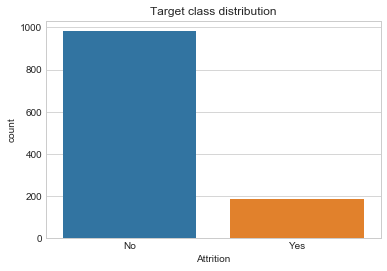

In [14]:
ax = plt.axes()
sns.countplot(x='Attrition', data=data, ax=ax);
ax.set_title('Target class distribution')
plt.show()

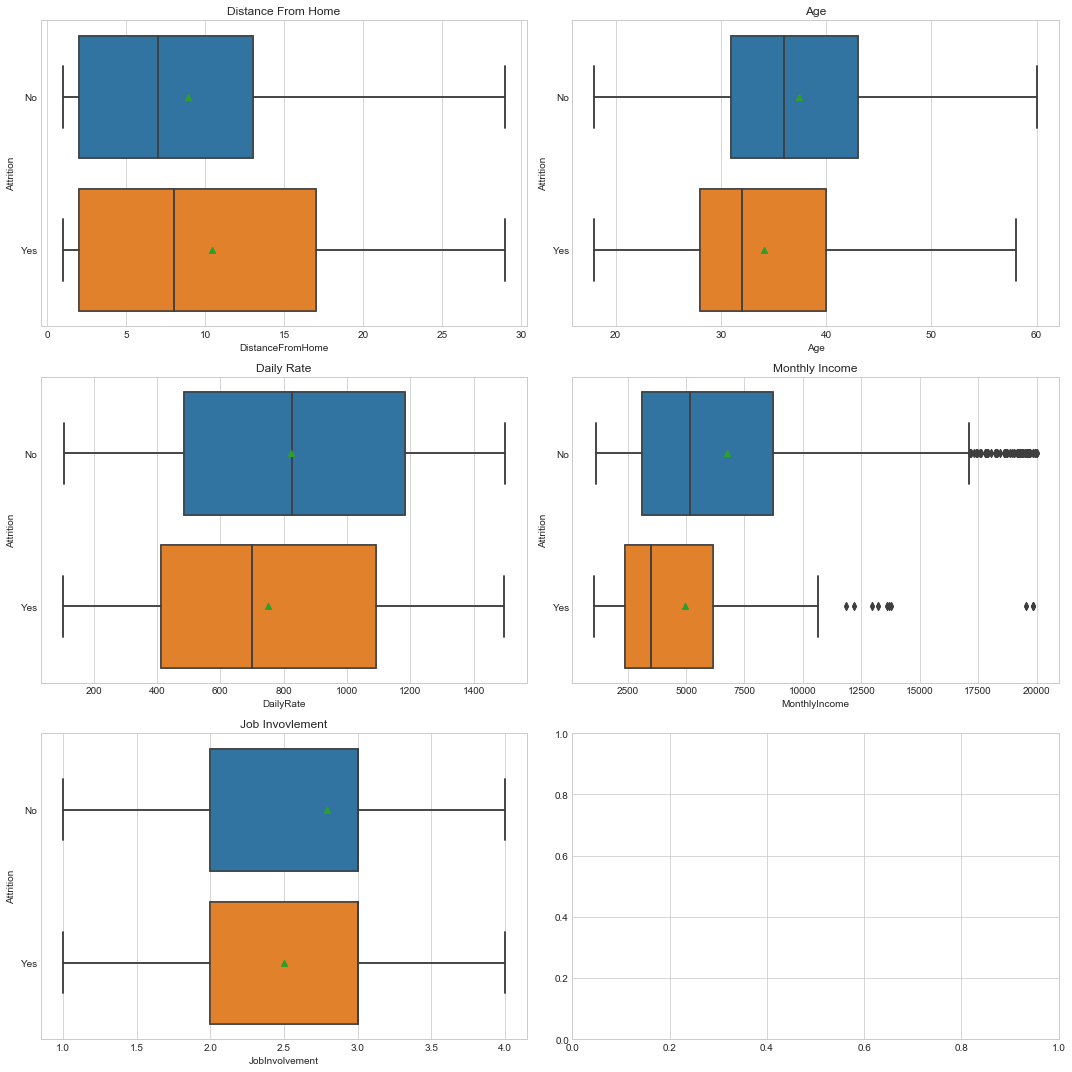

<Figure size 432x288 with 0 Axes>

In [101]:
f, axarr = plt.subplots(3, 2, figsize=(15, 15))

sns.boxplot(x='DistanceFromHome', y='Attrition', data=data, showmeans=True, ax=axarr[0,0])
sns.boxplot(x='Age', y='Attrition', data=data, showmeans=True, ax=axarr[0, 1])
sns.boxplot(x='DailyRate', y='Attrition', data=data, showmeans=True, ax=axarr[1, 0])
sns.boxplot(x='MonthlyIncome', y='Attrition', data=data, showmeans=True, ax=axarr[1, 1])
sns.boxplot(x='JobInvolvement', y='Attrition', showmeans=True, data=data, ax=axarr[2, 0])

            
axarr[0, 0].set_title('Distance From Home')
axarr[0, 1].set_title('Age')
axarr[1, 0].set_title('Daily Rate')
axarr[1, 1].set_title('Monthly Income')
axarr[2, 0].set_title('Job Invovlement')

sns.boxplot(x='DistanceFromHome', y='Attrition', data=data, showmeans=True, ax=axarr[0,0])
sns.boxplot(x='Age', y='Attrition', data=data, showmeans=True, ax=axarr[0, 1])
sns.boxplot(x='DailyRate', y='Attrition', data=data, showmeans=True, ax=axarr[1, 0])
sns.boxplot(x='MonthlyIncome', y='Attrition', data=data, showmeans=True, ax=axarr[1, 1])
sns.boxplot(x='JobInvolvement', y='Attrition', showmeans=True, data=data, ax=axarr[2, 0])

axarr[0, 0].set_title('Distance From Home')
axarr[0, 1].set_title('Age')
axarr[1, 0].set_title('Daily Rate')
axarr[1, 1].set_title('Monthly Income')
axarr[2, 0].set_title('Job Invovlement')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

In [19]:
unknown_mask = data['Attrition'].isnull()

In [20]:
data_cl = data.copy() # create a copy of data frame
target = data_cl['Attrition'].copy()

#Remove some columns
data_cl.drop('YearsWithCurrManager', axis=1, inplace=True) 
data_cl.drop('YearsSinceLastPromotion', axis=1, inplace=True) 
data_cl.drop('YearsInCurrentRole', axis=1, inplace=True) 
data_cl.drop('JobLevel', axis=1, inplace=True) 
data_cl.drop('TotalWorkingYears', axis=1, inplace=True)
data_cl.drop('PercentSalaryHike', axis=1, inplace=True)
data_cl.drop('Over18', axis=1, inplace=True)
data_cl.drop('Rand', axis=1, inplace=True)
data_cl.drop('EmployeeCount', axis=1, inplace=True)
data_cl.drop('EmployeeNumber', axis=1, inplace=True)
data_cl.drop('Attrition', axis=1, inplace=True)

In [21]:
def detect_outliers(series, whis=1.5):
    q75, q25 = np.percentile(series, [75 ,25])
    iqr = q75 - q25
    return ~((series - series.median()).abs() <= (whis * iqr))

In [22]:
data_cl['JobRole'].value_counts().sort_values()

Human Resources               52
Research Director             80
Sales Representative          83
Manager                      102
Healthcare Representative    131
Manufacturing Director       145
Laboratory Technician        259
Research Scientist           292
Sales Executive              326
Name: JobRole, dtype: int64

In [23]:
data_cl['JobRole'].value_counts().sort_values().index

CategoricalIndex(['Human Resources', 'Research Director',
                  'Sales Representative', 'Manager',
                  'Healthcare Representative', 'Manufacturing Director',
                  'Laboratory Technician', 'Research Scientist',
                  'Sales Executive'],
                 categories=['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', ...], ordered=False, dtype='category')

In [24]:
pd.get_dummies(data_cl['JobRole']).add_prefix('{}#'.format('JobRole'))

,JobRole#Healthcare Representative,JobRole#Human Resources,JobRole#Laboratory Technician,JobRole#Manager,JobRole#Manufacturing Director,JobRole#Research Director,JobRole#Research Scientist,JobRole#Sales Executive,JobRole#Sales Representative
ID,,,,,,,,,
1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,1


In [25]:
categorial_cols = ["BusinessTravel", "Department", "EducationField", 
                   "Gender", "JobRole", "MaritalStatus", "OverTime"]
for cc in categorial_cols:
    dummies = pd.get_dummies(data_cl[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    data_cl.drop(cc, axis=1, inplace=True)
    data_cl = data_cl.join(dummies)

In [26]:
# Separate dataset for validation

data_submit = data_cl[unknown_mask]

# Separate dataset for training
X = data_cl[~unknown_mask]
Y = target[~unknown_mask]

In [27]:
data_submit.head(2)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,BusinessTravel#Non-Travel,BusinessTravel#Travel_Frequently,BusinessTravel#Travel_Rarely,Department#Human Resources,Department#Research & Development,Department#Sales,EducationField#Human Resources,EducationField#Life Sciences,EducationField#Marketing,EducationField#Medical,EducationField#Other,EducationField#Technical Degree,Gender#Female,Gender#Male,JobRole#Healthcare Representative,JobRole#Human Resources,JobRole#Laboratory Technician,JobRole#Manager,JobRole#Manufacturing Director,JobRole#Research Director,JobRole#Research Scientist,JobRole#Sales Executive,JobRole#Sales Representative,MaritalStatus#Divorced,MaritalStatus#Married,MaritalStatus#Single,OverTime#No,OverTime#Yes
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1171,43,1001,7,3,3,43,3,1,9985,9262,8,3,1,80,1,1,2,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1172,35,619,1,3,2,85,3,3,4717,18659,9,3,3,80,0,2,3,11,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [28]:
threshold = 0.90
vt = VarianceThreshold().fit(X)

# Find feature names
feat_var_threshold = data_cl.columns[vt.variances_ > threshold * (1-threshold)]
feat_var_threshold

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'BusinessTravel#Travel_Frequently', 'BusinessTravel#Travel_Rarely',
       'Department#Research & Development', 'Department#Sales',
       'EducationField#Life Sciences', 'EducationField#Marketing',
       'EducationField#Medical', 'Gender#Female', 'Gender#Male',
       'JobRole#Laboratory Technician', 'JobRole#Research Scientist',
       'JobRole#Sales Executive', 'MaritalStatus#Divorced',
       'MaritalStatus#Married', 'MaritalStatus#Single', 'OverTime#No',
       'OverTime#Yes'],
      dtype='object')

In [29]:
model = RandomForestClassifier()
model.fit(X, Y)

feature_imp = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["importance"])
feat_imp_20 = feature_imp.sort_values("importance", ascending=False).head(20).index
feat_imp_20

Index(['YearsAtCompany', 'Age', 'MonthlyIncome', 'DailyRate', 'HourlyRate',
       'MonthlyRate', 'DistanceFromHome', 'NumCompaniesWorked',
       'StockOptionLevel', 'EnvironmentSatisfaction', 'OverTime#Yes',
       'RelationshipSatisfaction', 'JobSatisfaction', 'JobInvolvement',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'Education',
       'JobRole#Laboratory Technician', 'BusinessTravel#Travel_Frequently',
       'Gender#Female'],
      dtype='object')

In [30]:
X_minmax = MinMaxScaler(feature_range=(0,1)).fit_transform(X)
X_scored = SelectKBest(score_func=chi2, k='all').fit(X_minmax, Y)
feature_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': X_scored.scores_
    })

feat_scored_20 = feature_scoring.sort_values('score', ascending=False).head(20)['feature'].values
feat_scored_20

C:\Users\Mandrake\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array(['OverTime#Yes', 'JobRole#Sales Representative',
       'MaritalStatus#Single', 'OverTime#No',
       'BusinessTravel#Travel_Frequently', 'MaritalStatus#Divorced',
       'JobRole#Laboratory Technician', 'JobRole#Research Director',
       'StockOptionLevel', 'JobRole#Manufacturing Director',
       'JobRole#Manager', 'Department#Sales',
       'EducationField#Technical Degree', 'MonthlyIncome',
       'EnvironmentSatisfaction', 'BusinessTravel#Non-Travel',
       'JobRole#Healthcare Representative', 'MaritalStatus#Married',
       'EducationField#Marketing', 'JobInvolvement'], dtype=object)

In [31]:
rfe = RFE(LogisticRegression(), 20)
rfe.fit(X, Y)

feature_rfe_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': rfe.ranking_
    })

feat_rfe_20 = feature_rfe_scoring[feature_rfe_scoring['score'] == 1]['feature'].values
feat_rfe_20

array(['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'WorkLifeBalance', 'BusinessTravel#Non-Travel',
       'BusinessTravel#Travel_Frequently', 'EducationField#Other',
       'EducationField#Technical Degree', 'Gender#Female', 'Gender#Male',
       'JobRole#Human Resources', 'JobRole#Laboratory Technician',
       'JobRole#Manager', 'JobRole#Manufacturing Director',
       'JobRole#Research Director', 'JobRole#Sales Executive',
       'JobRole#Sales Representative', 'MaritalStatus#Divorced',
       'MaritalStatus#Single', 'OverTime#Yes'], dtype=object)

In [32]:
features = np.hstack([
        feat_var_threshold, 
        feat_imp_20,
        feat_scored_20,
        feat_rfe_20
    ])

features = np.unique(features)
print('Final features set:\n')
for f in features:
    print("\t-{}".format(f))

Final features set:

	-Age
	-BusinessTravel#Non-Travel
	-BusinessTravel#Travel_Frequently
	-BusinessTravel#Travel_Rarely
	-DailyRate
	-Department#Research & Development
	-Department#Sales
	-DistanceFromHome
	-Education
	-EducationField#Life Sciences
	-EducationField#Marketing
	-EducationField#Medical
	-EducationField#Other
	-EducationField#Technical Degree
	-EnvironmentSatisfaction
	-Gender#Female
	-Gender#Male
	-HourlyRate
	-JobInvolvement
	-JobRole#Healthcare Representative
	-JobRole#Human Resources
	-JobRole#Laboratory Technician
	-JobRole#Manager
	-JobRole#Manufacturing Director
	-JobRole#Research Director
	-JobRole#Research Scientist
	-JobRole#Sales Executive
	-JobRole#Sales Representative
	-JobSatisfaction
	-MaritalStatus#Divorced
	-MaritalStatus#Married
	-MaritalStatus#Single
	-MonthlyIncome
	-MonthlyRate
	-NumCompaniesWorked
	-OverTime#No
	-OverTime#Yes
	-PerformanceRating
	-RelationshipSatisfaction
	-StockOptionLevel
	-TrainingTimesLastYear
	-WorkLifeBalance
	-YearsAtCompany


In [33]:
data_cl = data_cl.ix[:, features]
data_submit = data_submit.ix[:, features]
X = X.ix[:, features]

print('Clean dataset shape: {}'.format(data_cl.shape))
print('Subbmitable dataset shape: {}'.format(data_submit.shape))
print('Train features shape: {}'.format(X.shape))
print('Target label shape: {}'. format(Y.shape))

Clean dataset shape: (1470, 43)
Subbmitable dataset shape: (300, 43)
Train features shape: (1170, 43)
Target label shape: (1170,)


In [34]:
components = 9
pca = PCA(n_components=components).fit(X)

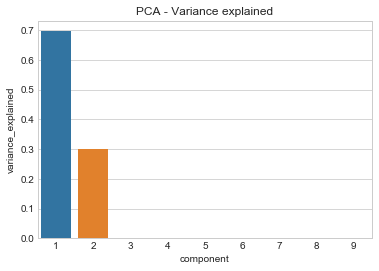

In [35]:
pca_variance_explained_df = pd.DataFrame({
    "component": np.arange(1, components+1),
    "variance_explained": pca.explained_variance_ratio_            
    })

ax = sns.barplot(x='component', y='variance_explained', data=pca_variance_explained_df)
ax.set_title("PCA - Variance explained")
plt.show()

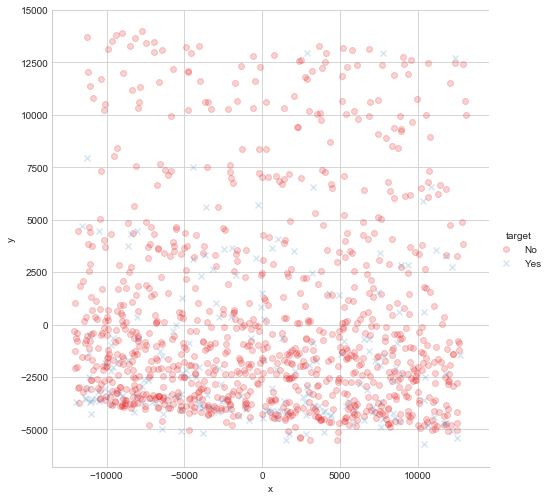

In [36]:
X_pca = pd.DataFrame(pca.transform(X)[:,:2])
X_pca['target'] = Y.values
X_pca.columns = ["x", "y", "target"]

sns.lmplot('x','y', 
           data=X_pca, 
           hue="target", 
           fit_reg=False, 
           markers=["o", "x"], 
           palette="Set1", 
           size=7,
           scatter_kws={"alpha": .2}
          )
plt.show()

In [66]:
seed = 7
processors=1
num_folds=3
num_instances=len(X)
scoring="roc_auc"

#kfold = KFold(scoring=scoring) #this is the old way of doing it sklearn

kfold = KFold(5)

In [67]:
# Prepare some basic models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier(n_neighbors=5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(probability=True)))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring="balanced_accuracy", n_jobs=processors)
    results.append(cv_results)
    names.append(name)
    print("{0}: ({1:.3f}) +/- ({2:.3f})".format(name, cv_results.mean(), cv_results.std()))

LR: (0.607) +/- (0.045)
LDA: (0.687) +/- (0.042)
K-NN: (0.508) +/- (0.016)
CART: (0.608) +/- (0.036)


C:\Users\Mandrake\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Mandrake\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Mandrake\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Mandrake\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Mandrake\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


NB: (0.710) +/- (0.043)
SVC: (0.500) +/- (0.000)


In [68]:
cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

(0.785) +/- (0.076)


In [69]:
num_trees = 100
num_features = 10

model = RandomForestClassifier(n_estimators=num_trees, max_features=num_features)

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

(0.811) +/- (0.071)


In [70]:
num_trees = 100
num_features = 10

model = ExtraTreesClassifier(n_estimators=num_trees, max_features=num_features)

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

(0.791) +/- (0.038)


In [71]:
model = AdaBoostClassifier(n_estimators=100, random_state=seed)

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

(0.779) +/- (0.050)


In [72]:
model = GradientBoostingClassifier(n_estimators=100, random_state=seed)

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

(0.787) +/- (0.046)


In [73]:
lr_grid = GridSearchCV(
    estimator = LogisticRegression(random_state=seed),
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 1, 10, 100, 1000]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

lr_grid.fit(X, Y)

print(lr_grid.best_score_)
print(lr_grid.best_params_)

0.8157668086225495
{'C': 10, 'penalty': 'l1'}


In [74]:
lda_grid = GridSearchCV(
    estimator = LinearDiscriminantAnalysis(),
    param_grid = {
        'solver': ['lsqr'],
        'shrinkage': [0, 0.25, 0.5, 0.75, 1],
        'n_components': [None, 2, 5, 10]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

lda_grid.fit(X, Y)

print(lda_grid.best_score_)
print(lda_grid.best_params_)

0.8130851292816073
{'n_components': None, 'shrinkage': 0, 'solver': 'lsqr'}


In [75]:
knn_grid = GridSearchCV(
    estimator = Pipeline([
        ('min_max_scaler', MinMaxScaler()),
        ('knn', KNeighborsClassifier())
    ]),
    param_grid = {
        'knn__n_neighbors': [25],
        'knn__algorithm': ['ball_tree'],
        'knn__leaf_size': [2, 3, 4],
        'knn__p': [1]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

knn_grid.fit(X, Y)

print(knn_grid.best_score_)
print(knn_grid.best_params_)

C:\Users\Mandrake\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Mandrake\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Mandrake\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Mandrake\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Mandrake\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype ui

0.7523898793629535
{'knn__algorithm': 'ball_tree', 'knn__leaf_size': 2, 'knn__n_neighbors': 25, 'knn__p': 1}


C:\Users\Mandrake\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [76]:
rf_grid = GridSearchCV(
    estimator = RandomForestClassifier(warm_start=True, random_state=seed),
    param_grid = {
        'n_estimators': [100, 200],
        'criterion': ['gini', 'entropy'],
        'max_features': [18, 20],
        'max_depth': [8, 10],
        'bootstrap': [True]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

rf_grid.fit(X, Y)

print(rf_grid.best_score_)
print(rf_grid.best_params_)

0.801600396714527
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 18, 'n_estimators': 200}


In [77]:
ada_grid = GridSearchCV(
    estimator = AdaBoostClassifier(random_state=seed),
    param_grid = {
        'algorithm': ['SAMME', 'SAMME.R'],
        'n_estimators': [10, 25, 50],
        'learning_rate': [1e-3, 1e-2, 1e-1]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

ada_grid.fit(X, Y)

print(ada_grid.best_score_)
print(ada_grid.best_params_)

0.7845605899829852
{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 50}


In [78]:
gbm_grid = GridSearchCV(
    estimator = GradientBoostingClassifier(warm_start=True, random_state=seed),
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [2, 3, 4],
        'max_features': [10, 15, 20],
        'learning_rate': [1e-1, 1]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

gbm_grid.fit(X, Y)

print(gbm_grid.best_score_)
print(gbm_grid.best_params_)

0.8128914841353355
{'learning_rate': 0.1, 'max_depth': 2, 'max_features': 10, 'n_estimators': 200}


In [99]:
# Create sub models
estimators = []

estimators.append(('lr', LogisticRegression(penalty='l1', C=100)))

estimators.append(('rf', RandomForestClassifier(bootstrap=True, max_depth=10, n_estimators=200, max_features=20, criterion='entropy', random_state=seed)))

estimators.append(('ada', AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.1, n_estimators=50, random_state=seed)))

estimators.append(('gbm', GradientBoostingClassifier(n_estimators=100, max_depth=2, learning_rate=1, max_features=10, warm_start=True, random_state=seed)))

#KNN

#LDA 

# I cheaped out on model weight tuning. I just spent some time playing around with different weights.
# Given more time, I need to write a custom CV weight validation function, but thats a bridge too far right now.
#I aslo only used a few of the sub models, just due to time. 

# create the ensemble model
ensemble = VotingClassifier(estimators, voting='soft', weights=[4,2,1,2])

results = cross_val_score(ensemble, X, Y, cv=kfold, scoring=scoring,n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

(0.822) +/- (0.048)


In [114]:
model = ensemble

model.fit(X, Y)
preds = model.predict_proba(data_submit)

submission = pd.DataFrame()
submission["ID"] = data_submit.index
#submission["Attrition"]= preds[:,0]
submission["Attrition_Probability"]= preds[:,1]
submission['Attrition_Indicator'] = np.where(submission['Attrition_Probability'] > .50 , 'Yes', 'No')

submission.to_excel('sub2.xlsx')
submission.to_csv("sub.csv",index=False)

In [115]:
print(submission)

       ID  Attrition_Probability Attrition_Indicator
0    1171               0.108140                  No
1    1172               0.193705                  No
2    1173               0.060851                  No
3    1174               0.117284                  No
4    1175               0.147824                  No
5    1176               0.279392                  No
6    1177               0.051237                  No
7    1178               0.078138                  No
8    1179               0.310819                  No
9    1180               0.405411                  No
10   1181               0.071368                  No
11   1182               0.115946                  No
12   1183               0.063772                  No
13   1184               0.149624                  No
14   1185               0.105628                  No
15   1186               0.062001                  No
16   1187               0.105922                  No
17   1188               0.202427              

In [103]:
results

array([0.89411765, 0.82247222, 0.74268353, 0.81780766, 0.83042427])